In [ ]:
# import os
# os.environ["JAX_PLATFORM_NAME"] = "cpu" // for use on ARM Macs

import jax
print("JAX device:", jax.devices())
jax.config.update('jax_disable_jit', False) # Turn off JIT because of an issue in shortwave_radiation.py:169
jax.config.update("jax_debug_infs", True) # doesn't add any time since the saved time is otherwise spent getting the nodal quantities
jax.config.update("jax_debug_nans", False) # some physics fields might be nan

JAX device: [CpuDevice(id=0)]


In [ ]:
import jax.numpy as jnp
import xarray as xr
from jcm.boundaries import boundaries_from_file

realistic_orography = jnp.asarray(xr.open_dataarray('../jcm/data/bc/t30/clim/orography_t31.nc'))
realistic_boundaries = boundaries_from_file('../jcm/data/bc/t30/clim/boundaries_daily_t31.nc')

In [ ]:
from jcm.model import Model

model = Model(
    # orography=realistic_orography,
)
predictions = model.run(
    save_interval=5,
    total_time=60,
    # boundaries=realistic_boundaries,
)

In [14]:
pred_ds = model.predictions_to_xarray(predictions)

In [15]:
print(f"dataset size: {pred_ds.nbytes/1e6:.1f}MB")

dataset size: 44.0MB


In [16]:
pred_ds

<xarray.Dataset> Size: 44MB
Dimensions:                          (time: 12, lon: 96, lat: 48, level: 8)
Coordinates:
  * lon                              (lon) float64 768B 0.0 3.75 ... 352.5 356.2
  * lat                              (lat) float64 384B -87.16 -83.48 ... 87.16
  * level                            (level) float32 32B 0.95 0.835 ... 0.025
  * time                             (time) datetime64[ns] 96B 2000-01-01 ......
Data variables: (12/79)
    shortwave_rad.rsns               (time, lon, lat) float32 221kB 340.6 ......
    mod_radcon.tau2.0                (time, level, lon, lat) float32 2MB 0.97...
    surface_flux.tskin               (time, lon, lat) float32 221kB 273.1 ......
    shortwave_rad.stratz             (time, lon, lat) float32 221kB 0.0 ... 6.0
    shortwave_rad.zenit              (time, lon, lat) float32 221kB 1.316 ......
    surface_flux.ustr.2              (time, lon, lat) float32 221kB 0.0 ... -...
    ...                               ...
    geopotential                     (time, level, lon, lat) float32 2MB 4.23...
    mod_radcon.stratc.0              (time, lon, lat) float32 221kB 0.0 ... 6.07
    surface_flux.rlds                (time, lon, lat) float32 221kB 87.85 ......
    mod_radcon.albsfc                (time, lon, lat) float32 221kB 0.07 ... ...
    shortwave_rad.icltop             (time, lon, lat) int32 221kB 1 1 1 ... 4 4
    surface_flux.evap.1              (time, lon, lat) float32 221kB 0.006839 ...
Attributes:
    longitude_wavenumbers:     32
    total_wavenumbers:         33
    longitude_nodes:           96
    latitude_nodes:            48
    latitude_spacing:          gauss
    longitude_offset:          0.0
    radius:                    6371220.0
    spherical_harmonics_impl:  RealSphericalHarmonics
    spmd_mesh:                 
    boundaries:                [0.0, 0.05000000074505806, 0.14000000059604645...
    horizontal_grid_type:      Grid
    vertical_grid_type:        SigmaCoordinates

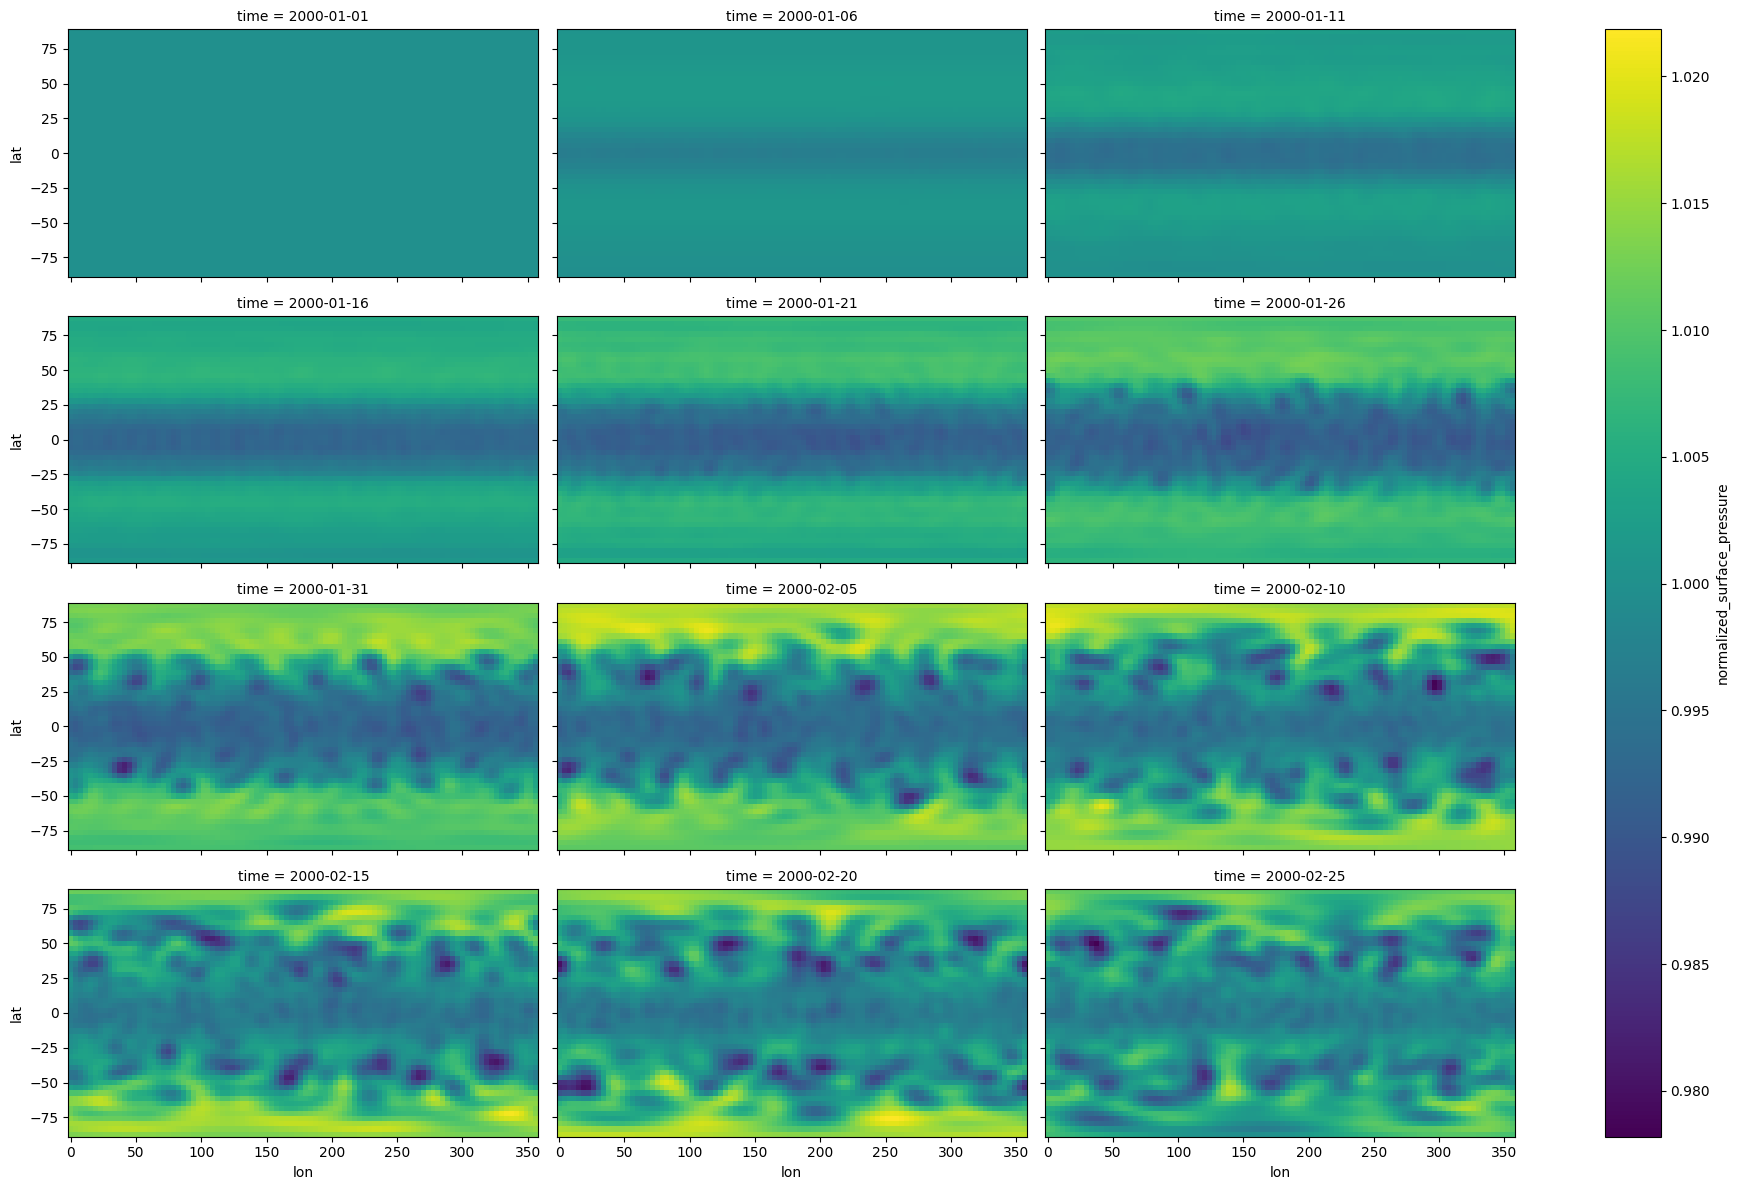

In [8]:
pred_ds['normalized_surface_pressure'].plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2)

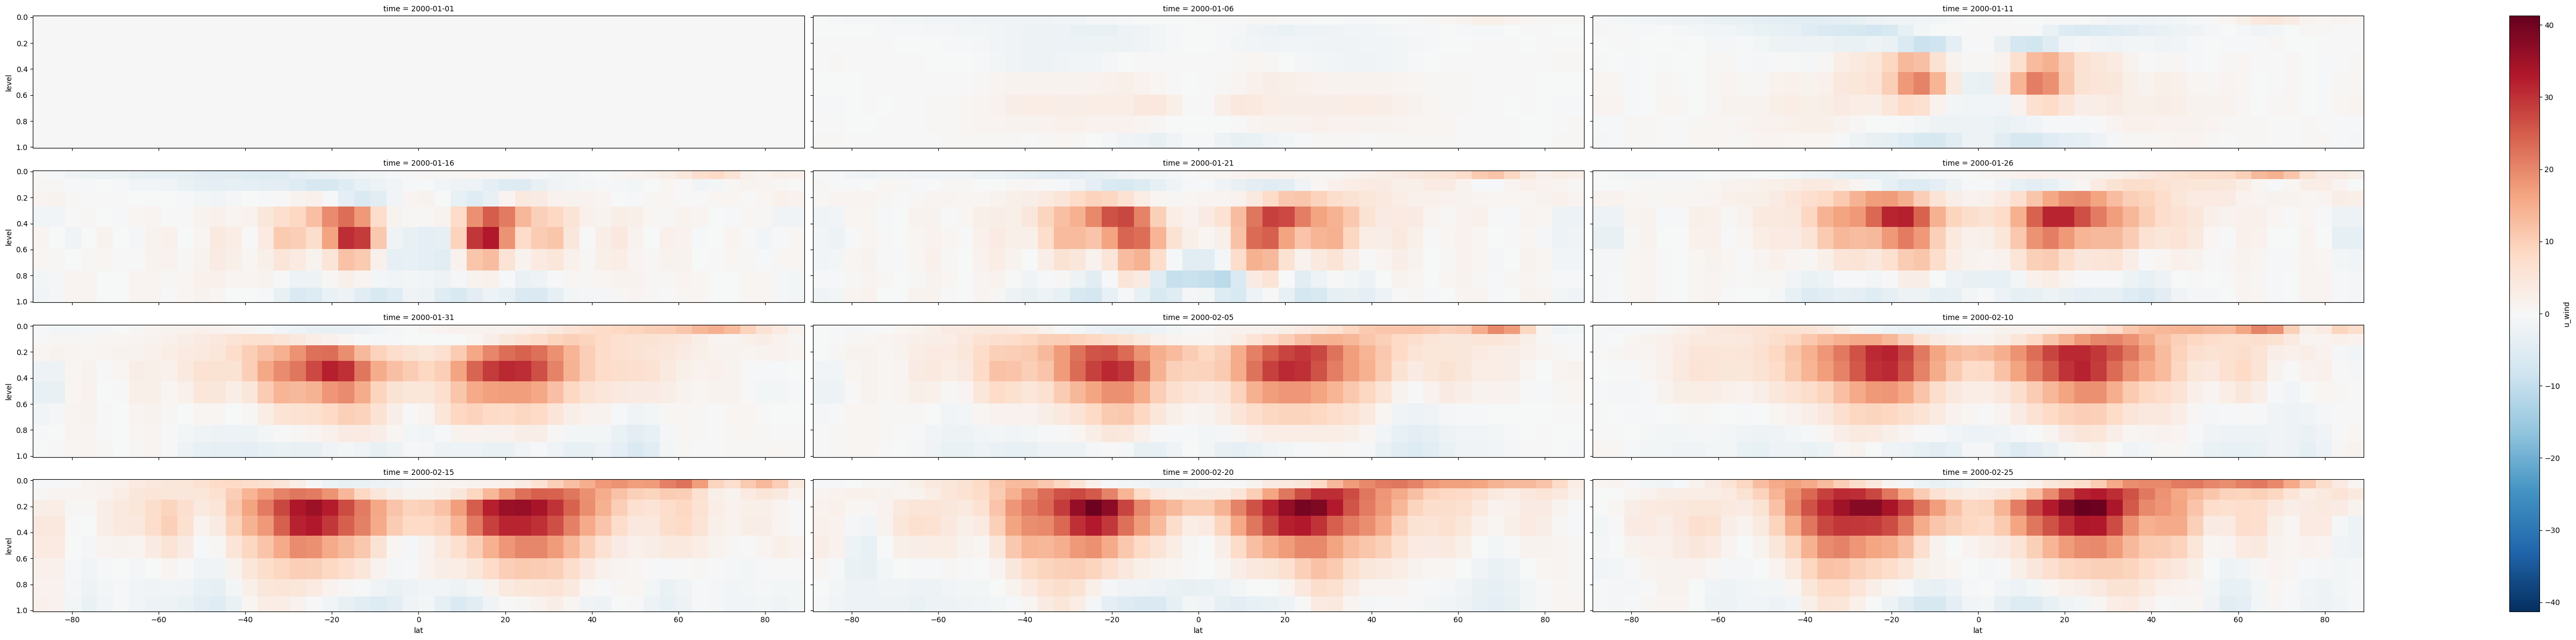

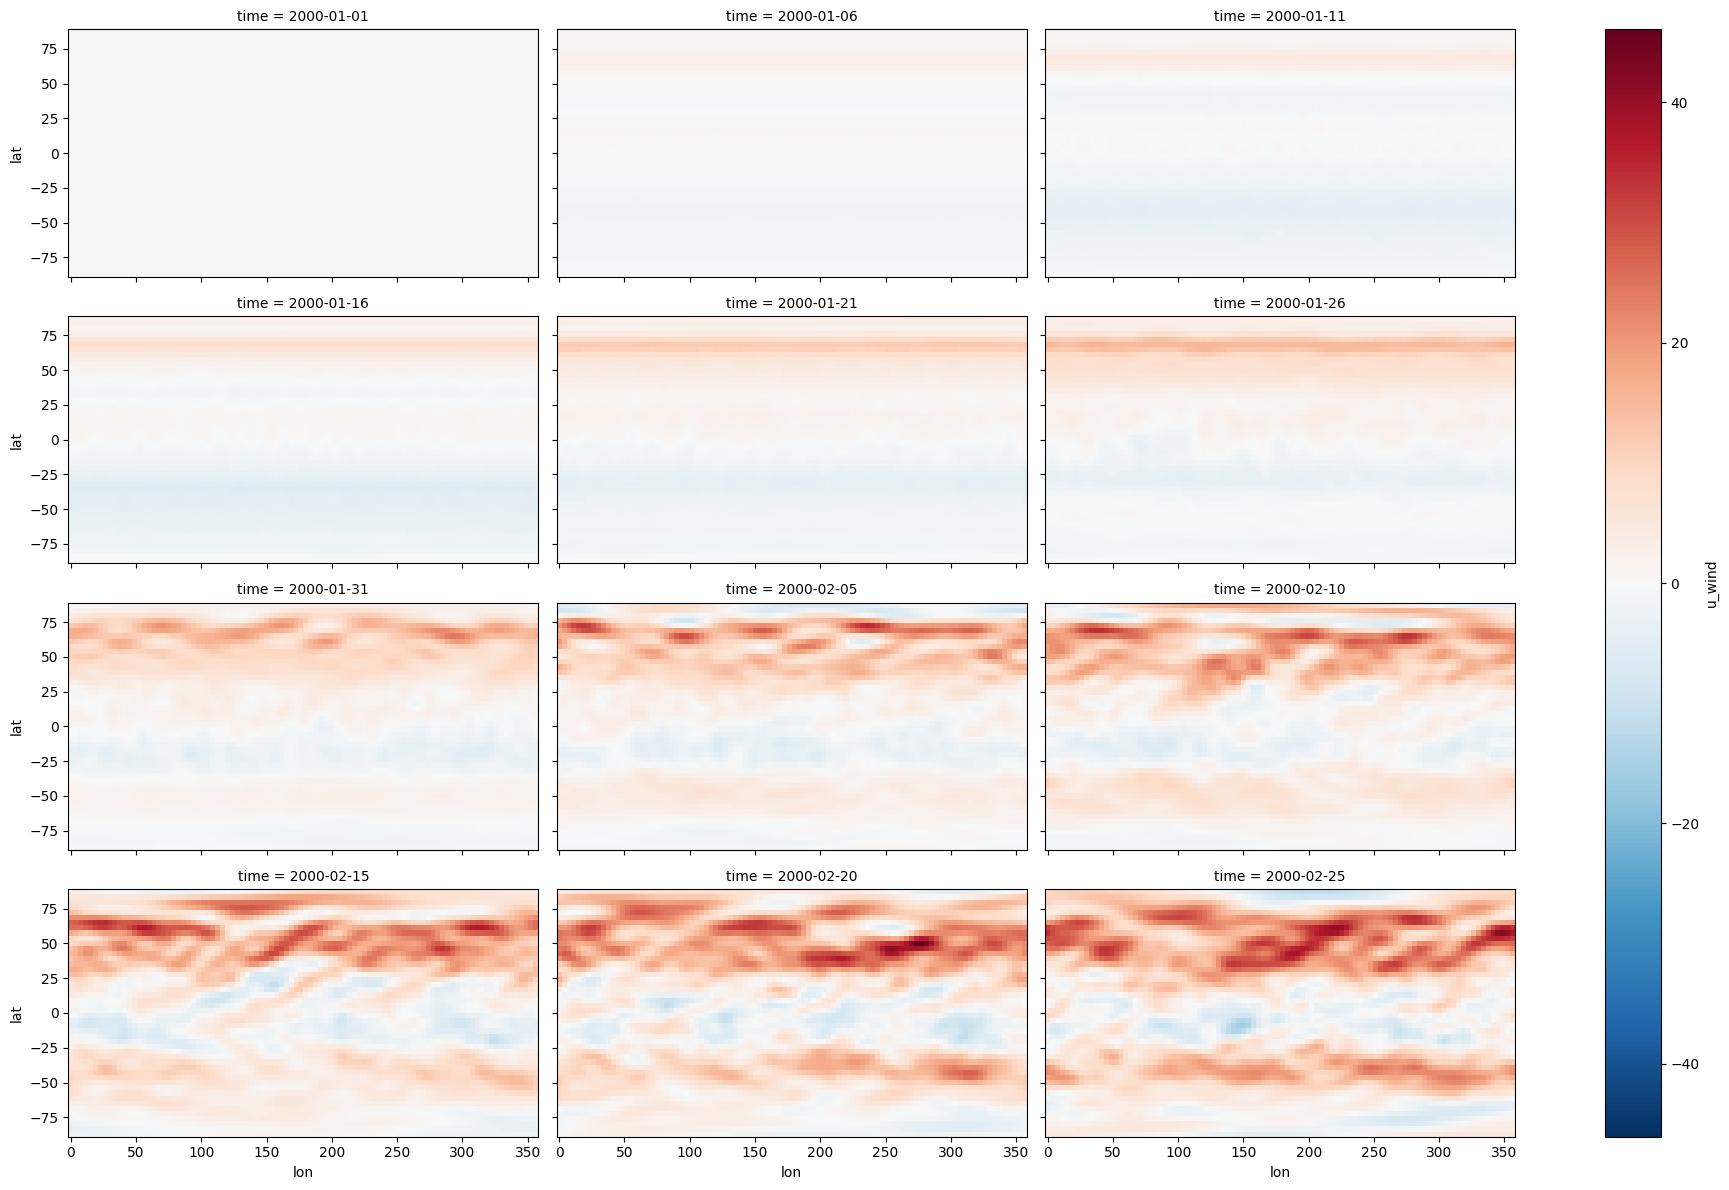

In [9]:
pred_ds['u_wind'].mean('lon').plot(x='lat', y='level', col='time', col_wrap=3, aspect=6, yincrease=False)
pred_ds['u_wind'].isel(level=-1).plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2)

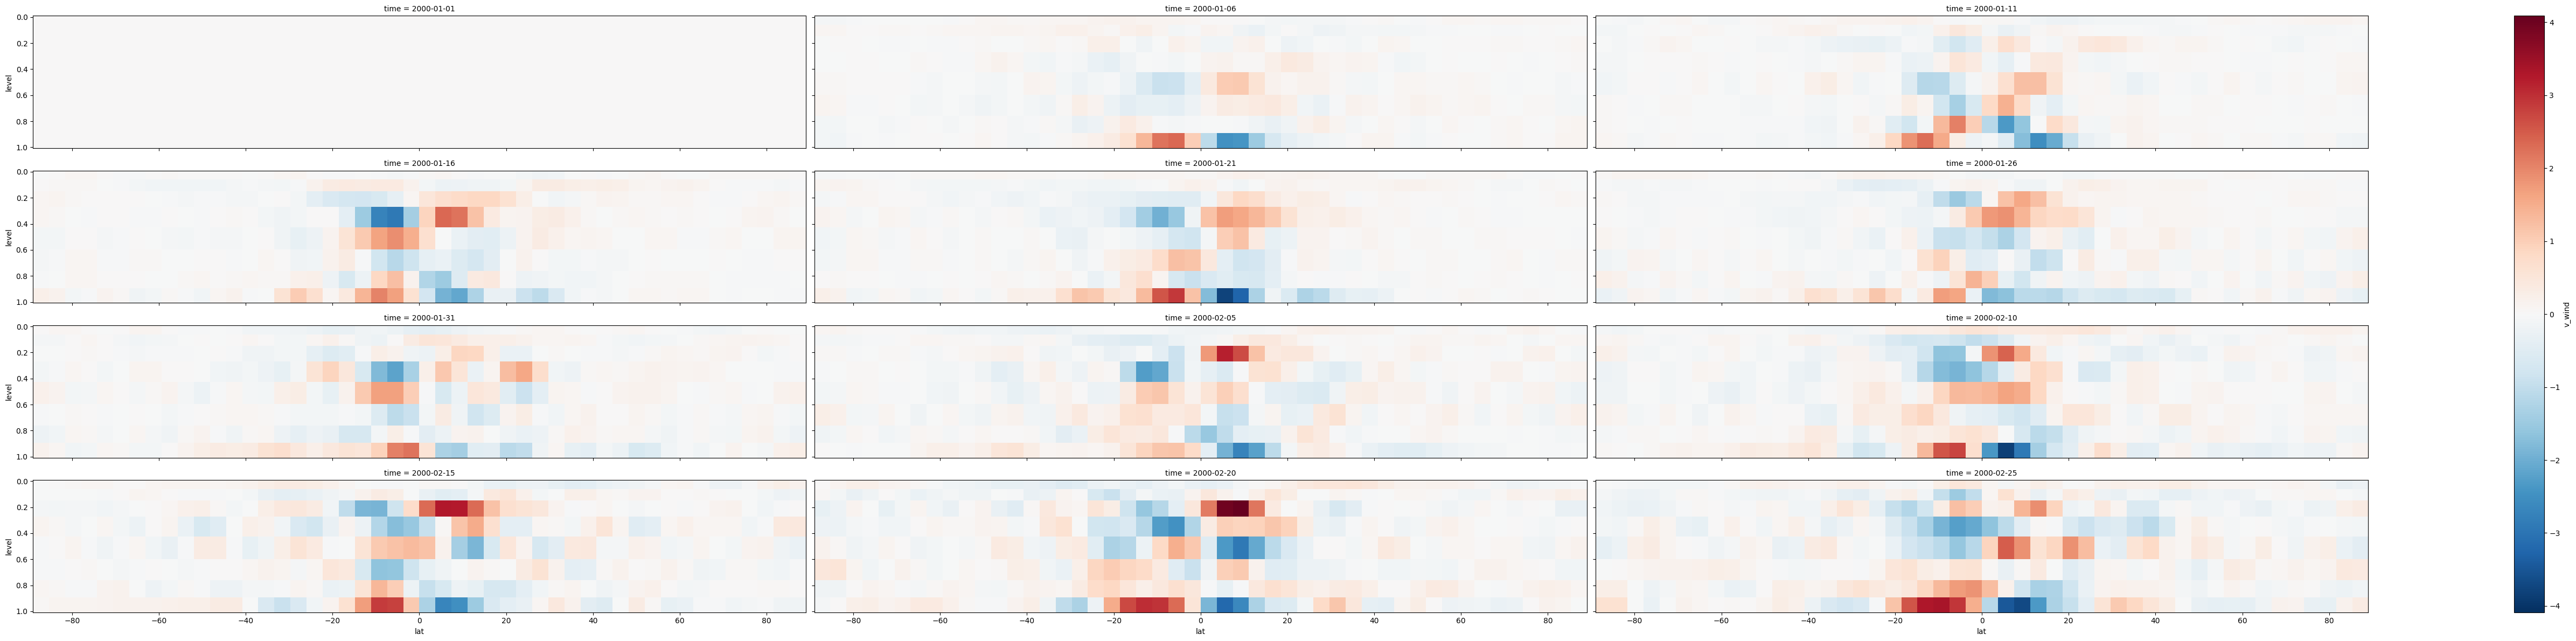

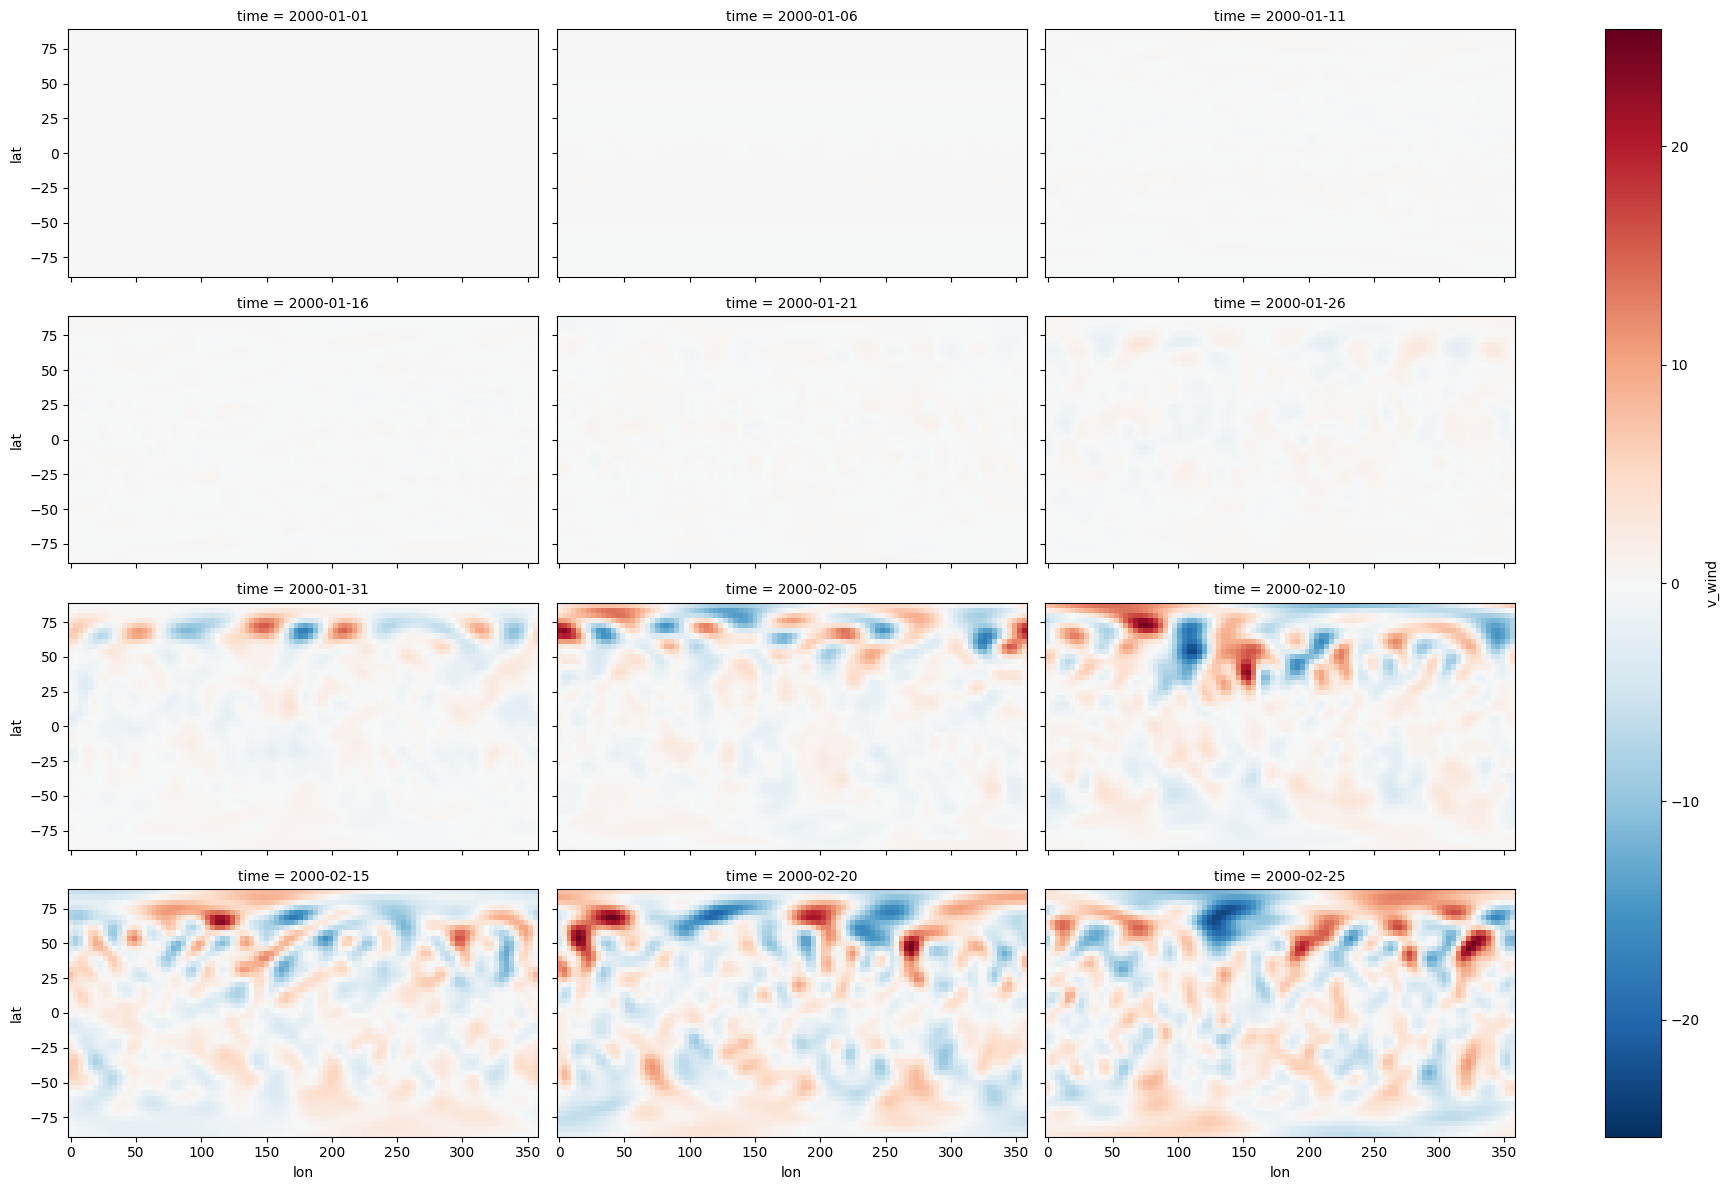

In [ ]:
pred_ds['v_wind'].mean('lon').plot(x='lat', y='level', col='time', col_wrap=3, aspect=6, yincrease=False)
pred_ds['v_wind'].isel(level=-1).plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2)

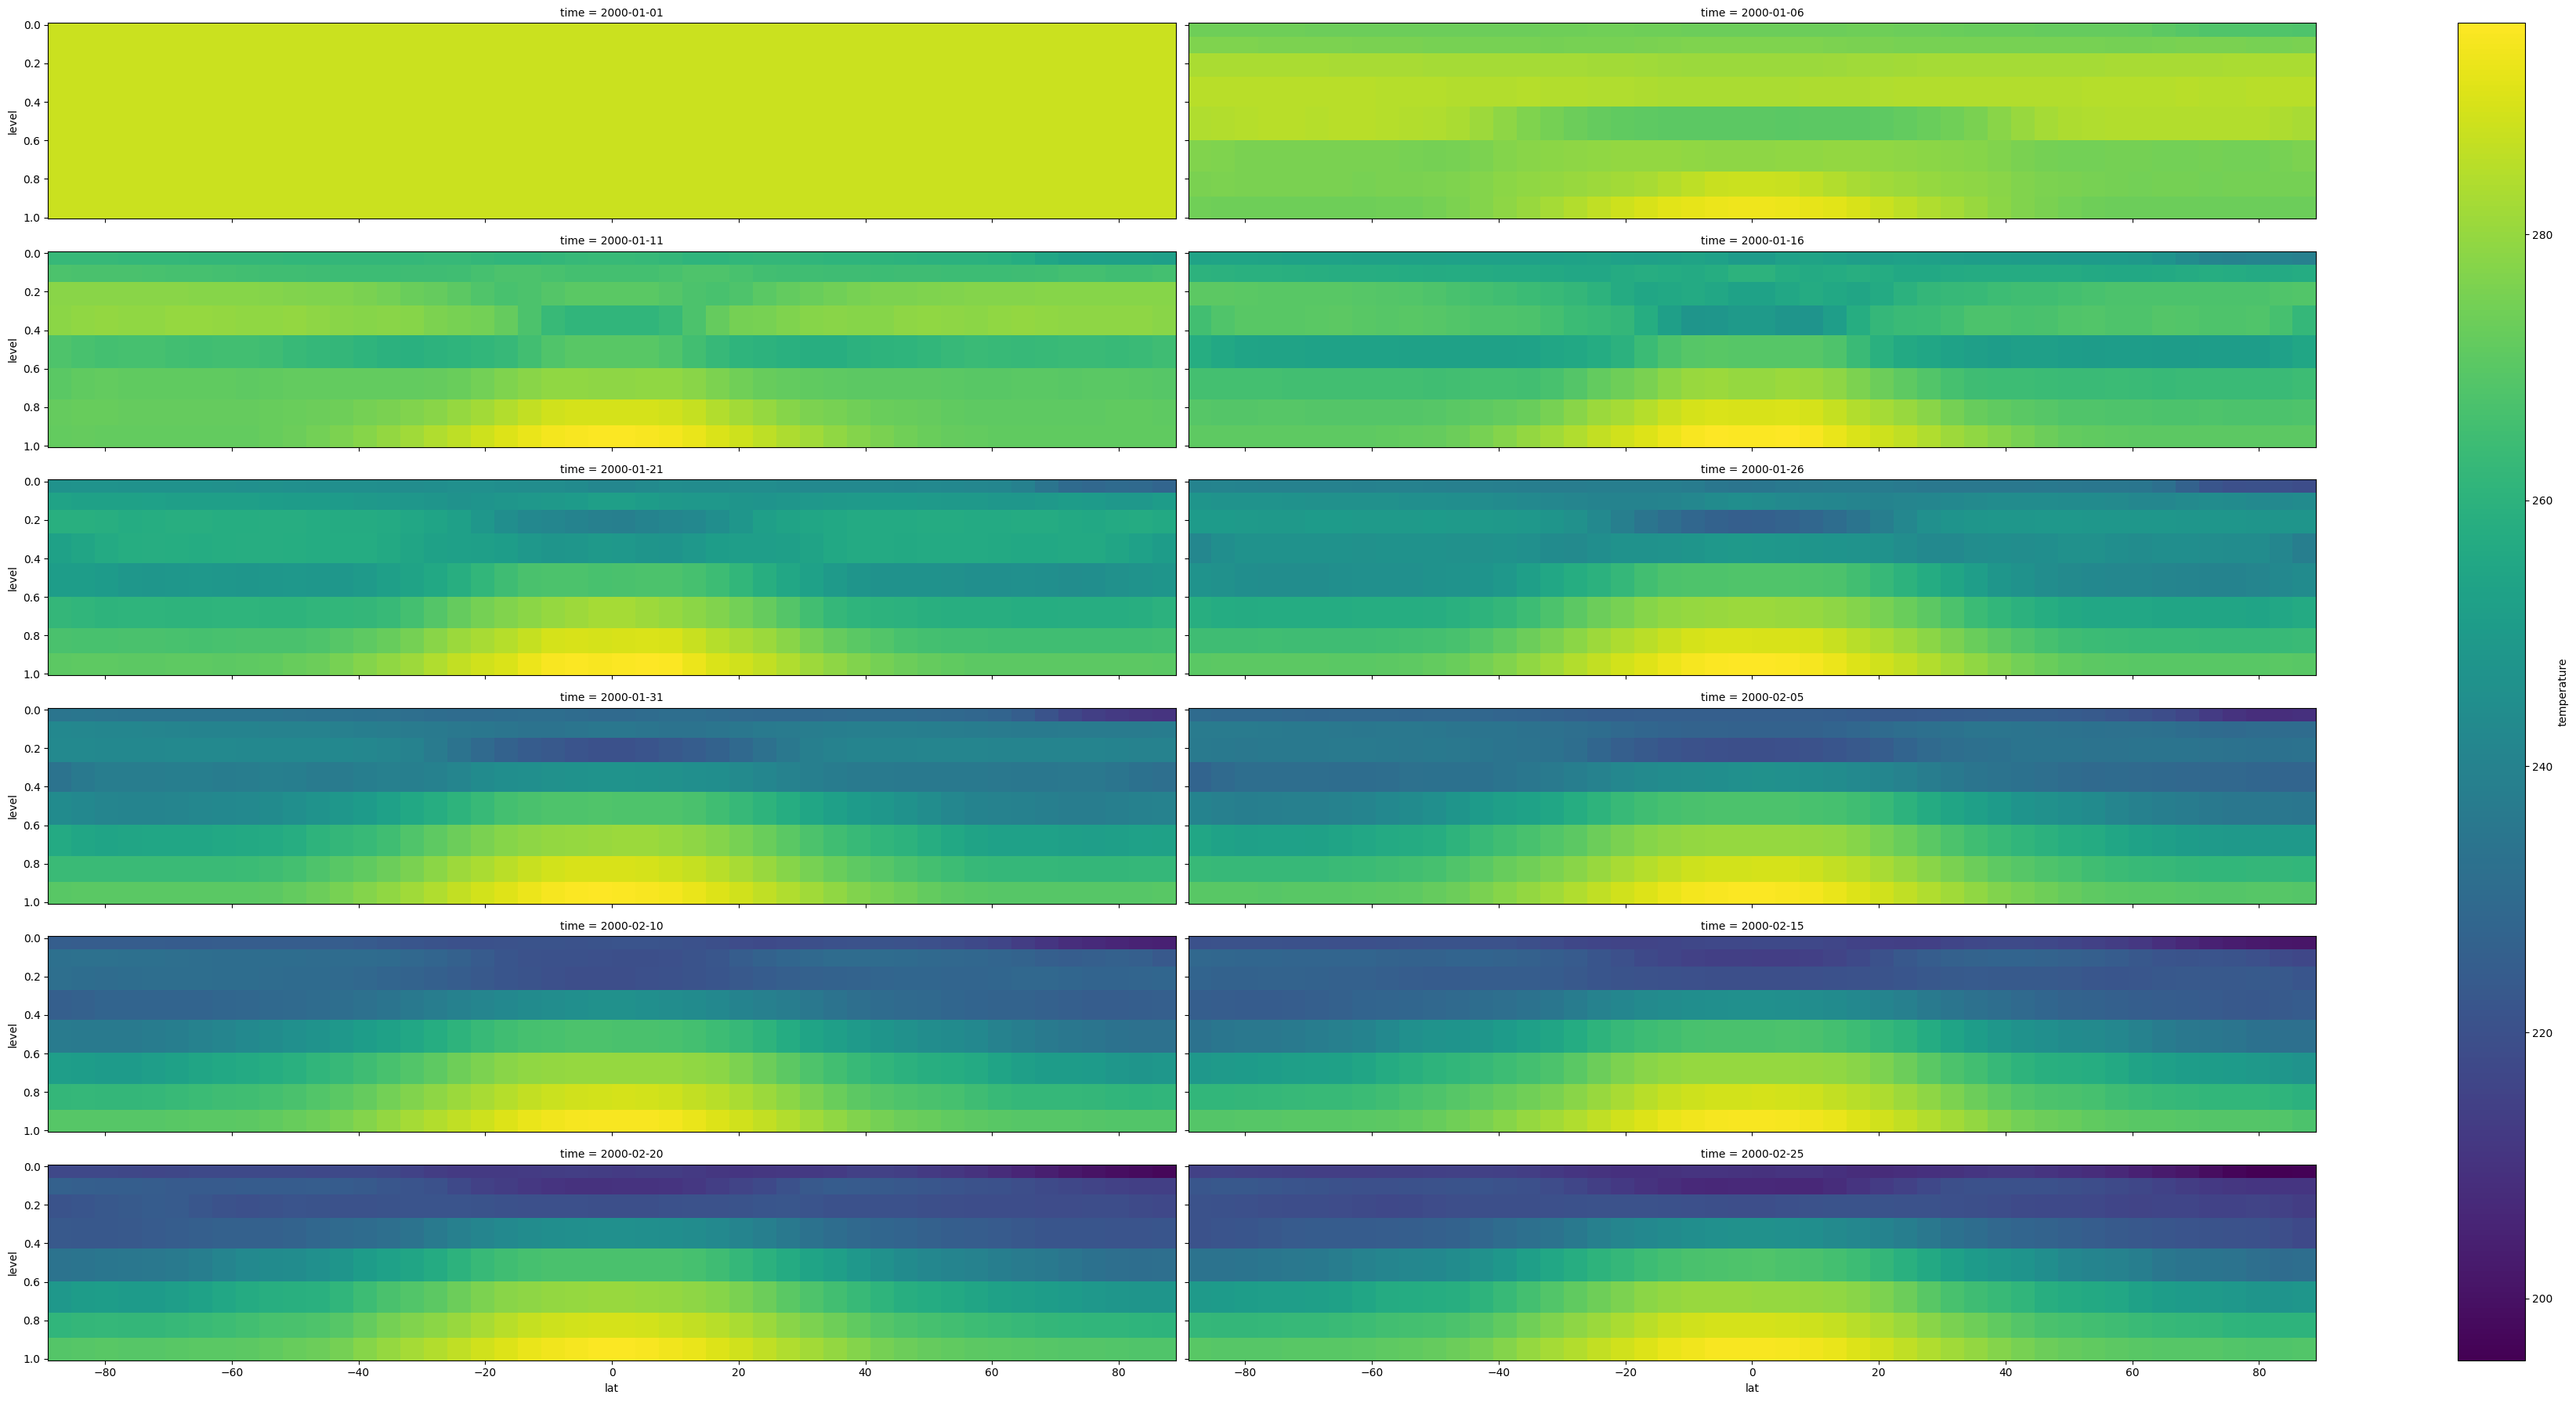

In [ ]:
pred_ds['temperature'].mean('lon').plot(x='lat', y='level', col='time', col_wrap=2, aspect=6, yincrease=False)

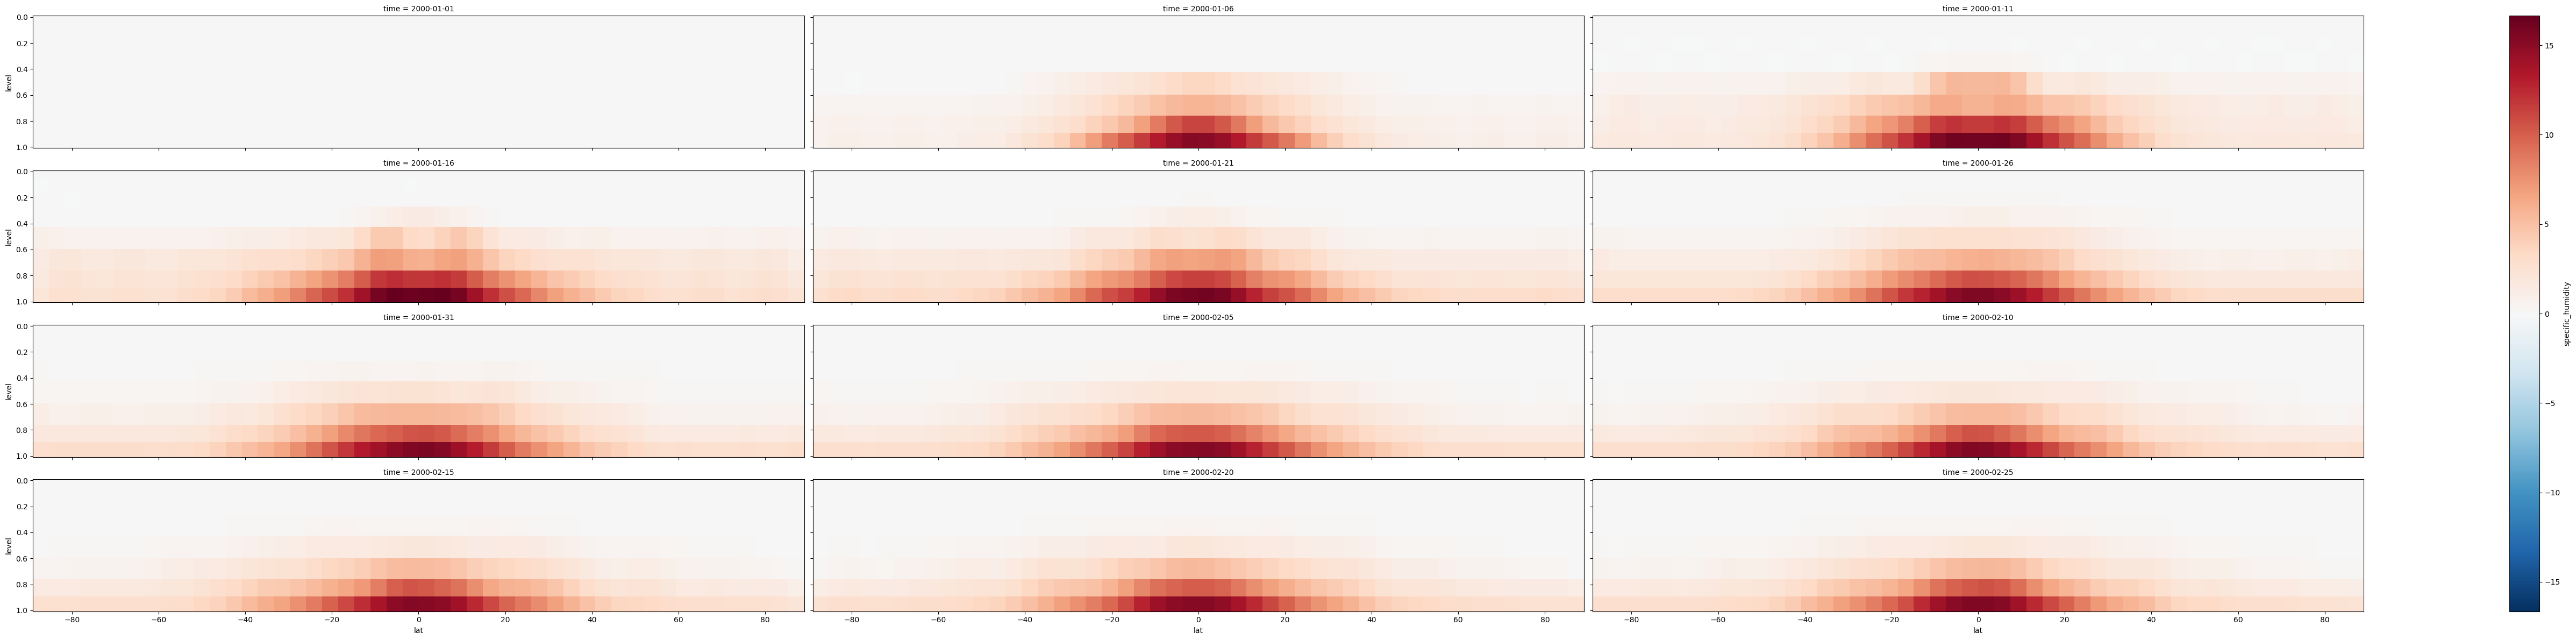

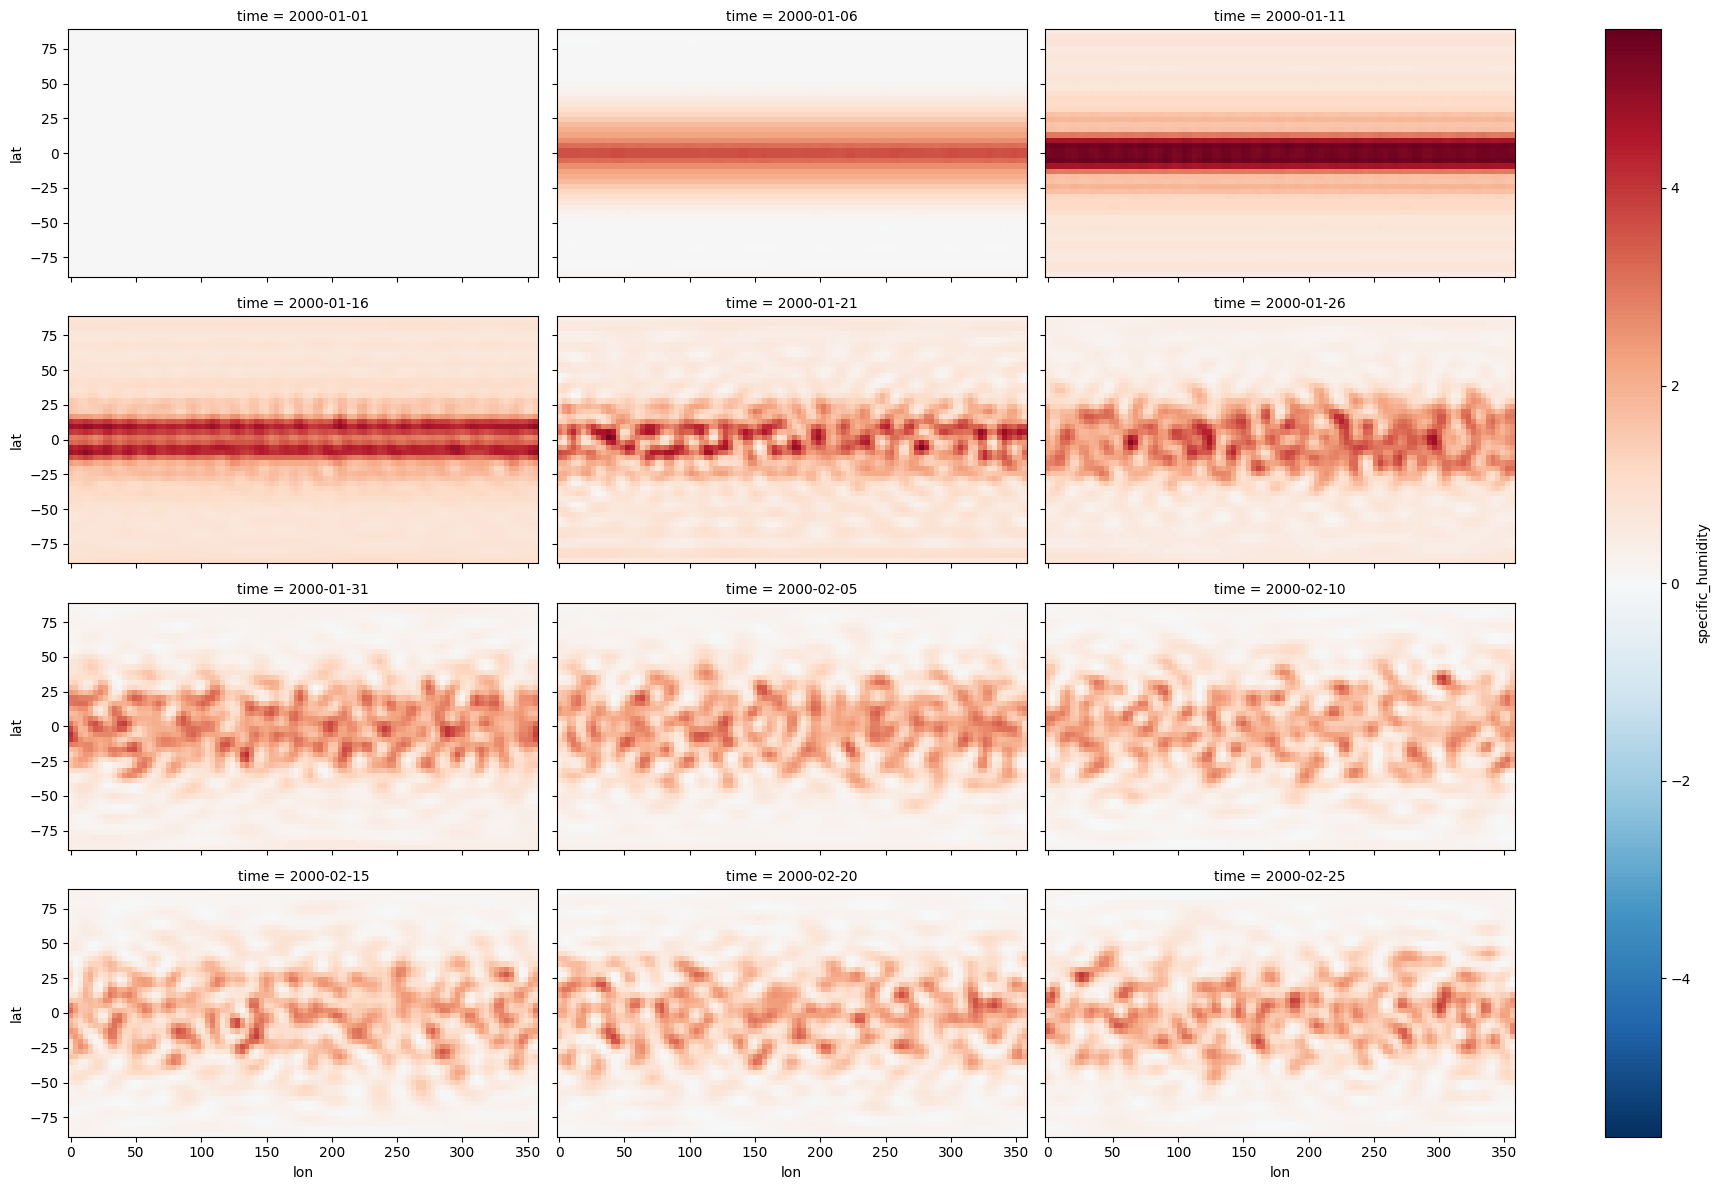

In [ ]:
pred_ds['specific_humidity'].mean('lon').plot(x='lat', y='level', col='time', col_wrap=3, aspect=6, yincrease=False)
pred_ds['specific_humidity'].isel(level=3).plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2)

### clouds!

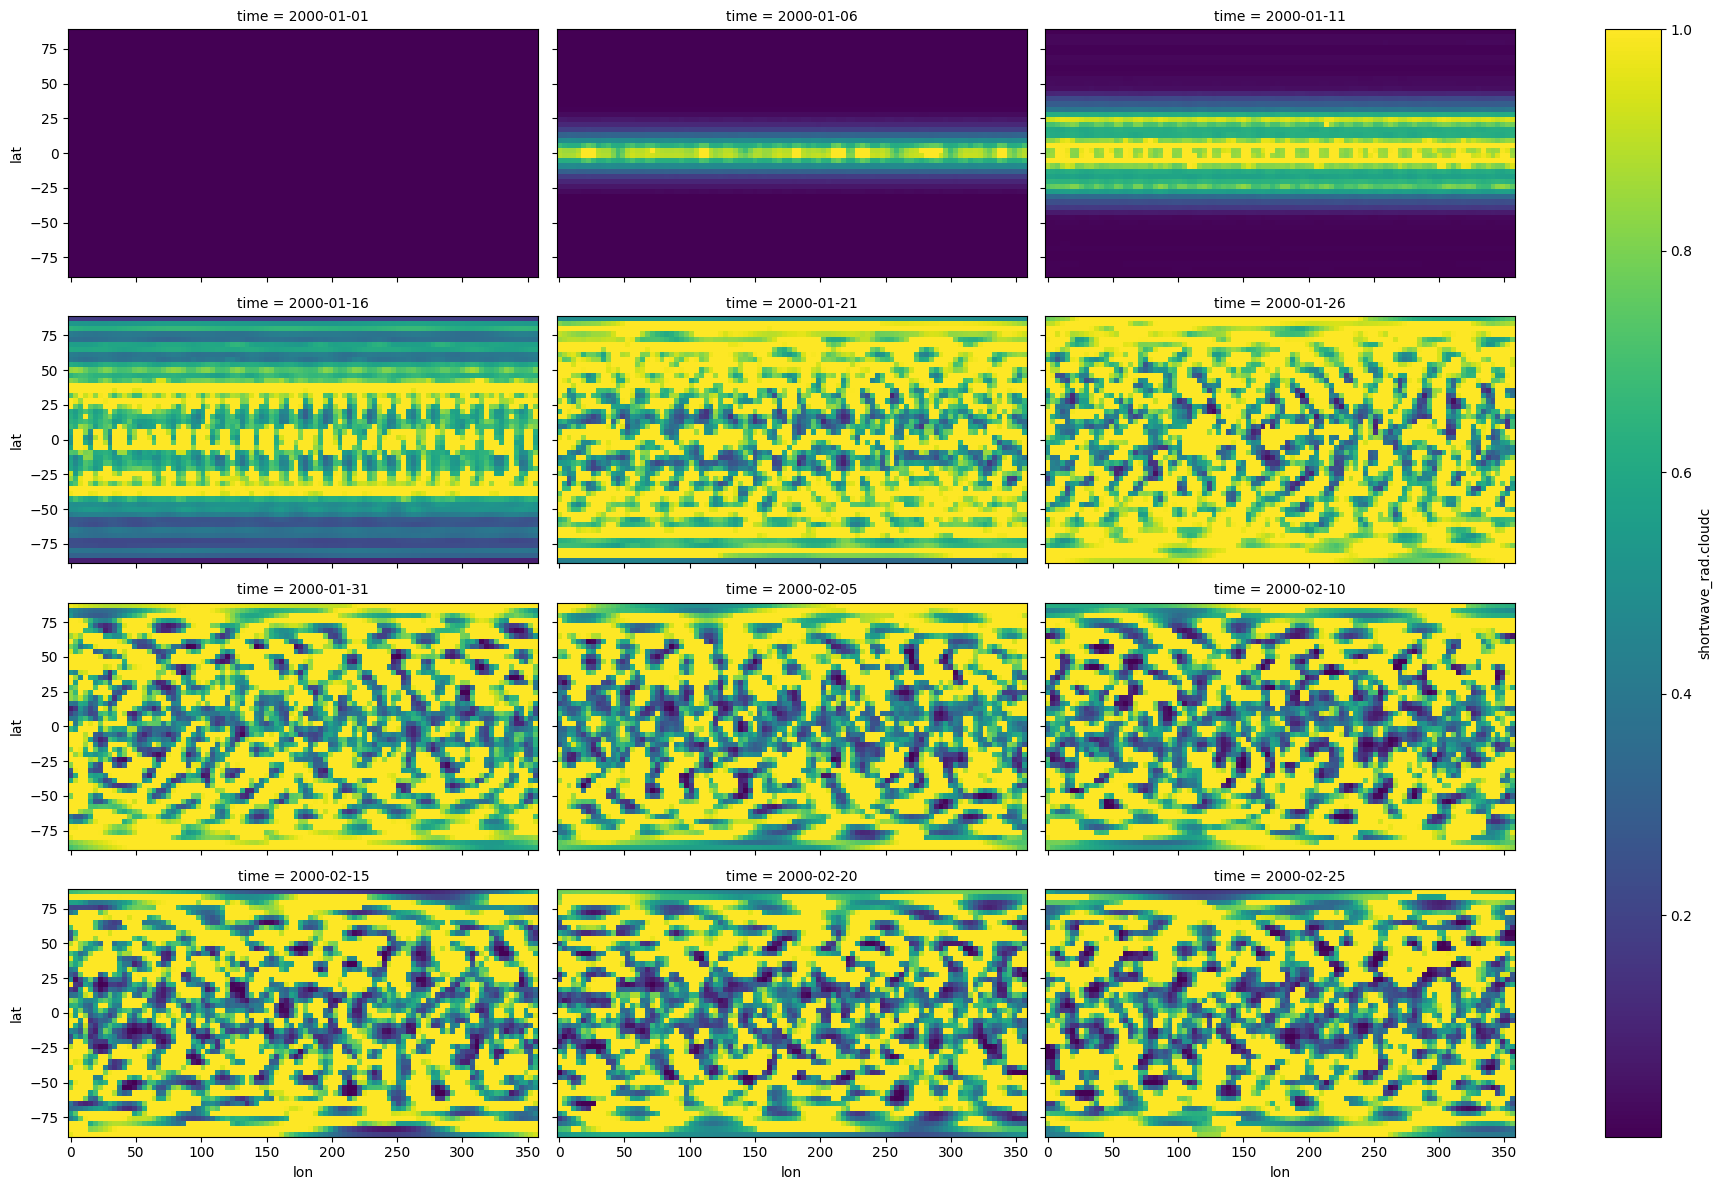

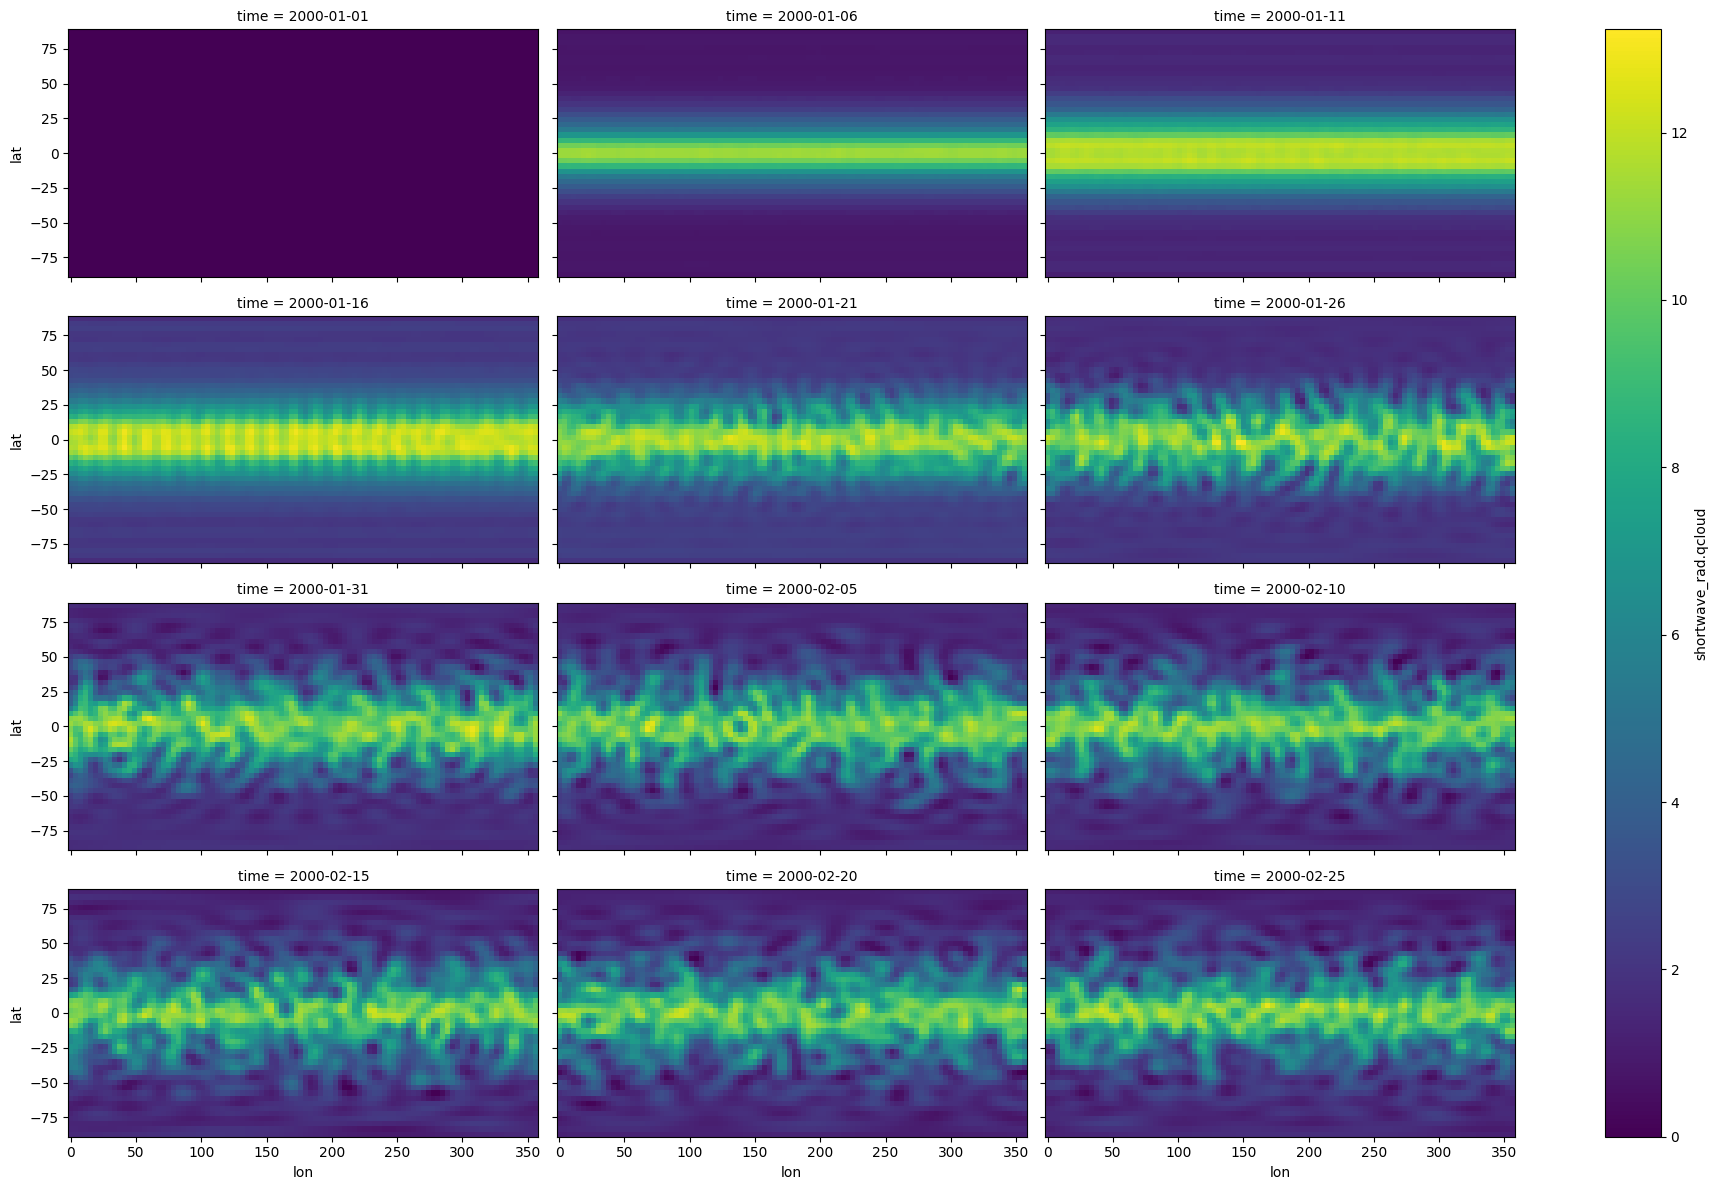

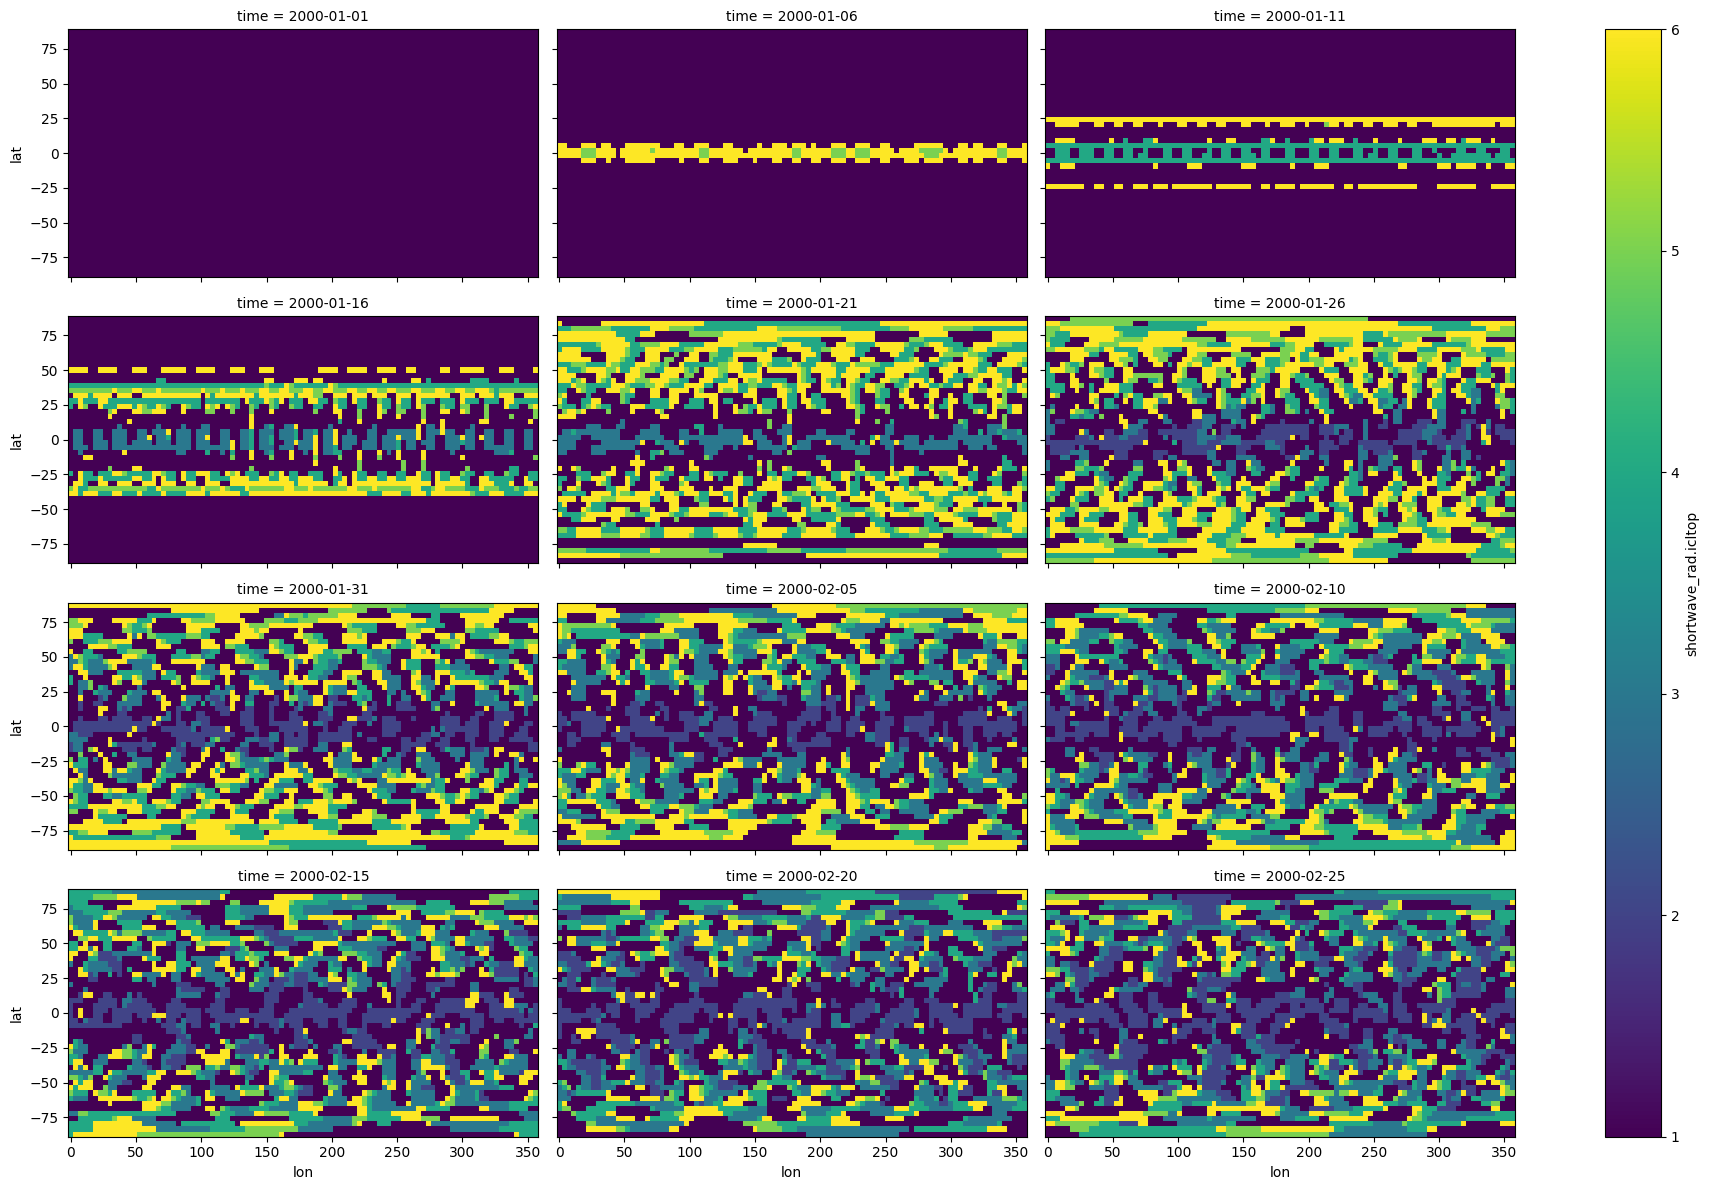

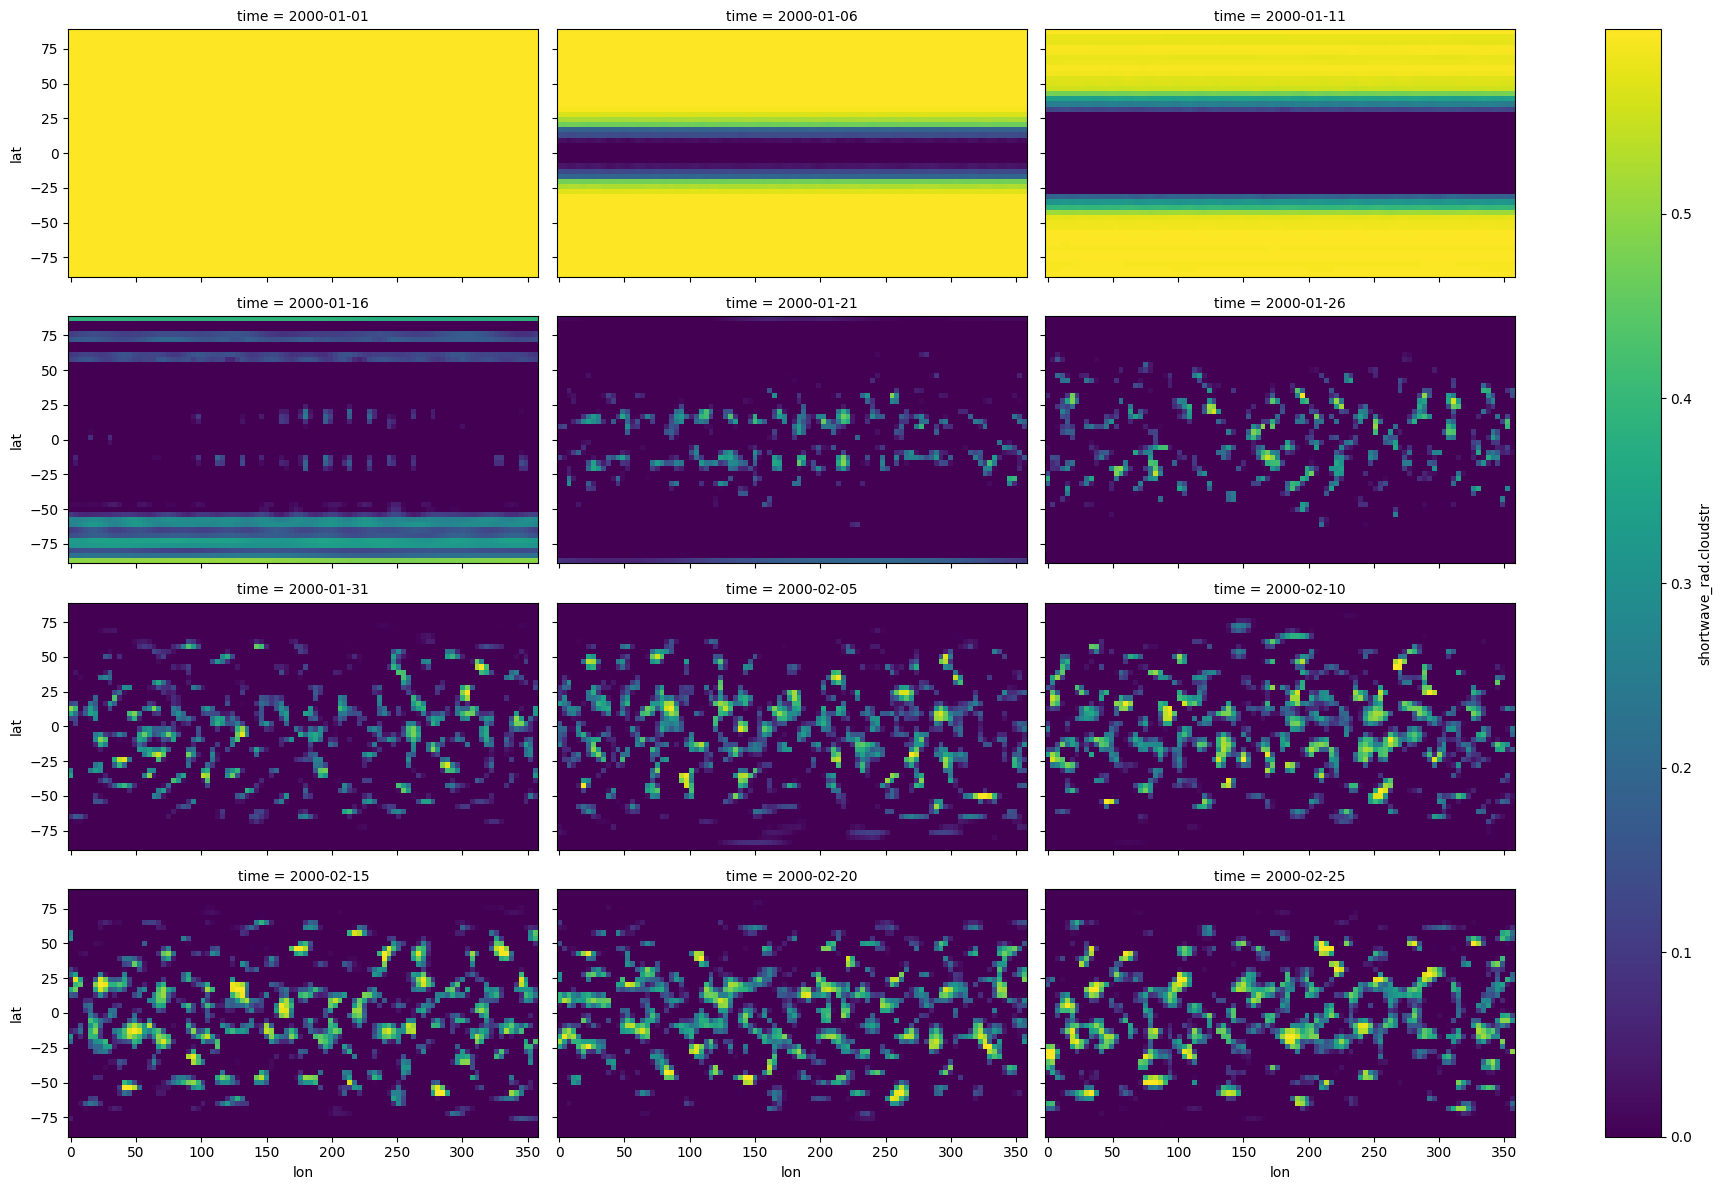

In [ ]:
pred_ds['shortwave_rad.cloudc'].plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2)
pred_ds['shortwave_rad.qcloud'].plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2)
pred_ds['shortwave_rad.icltop'].plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2)
pred_ds['shortwave_rad.cloudstr'].plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2)